# Data Scientist Course Project 1
For this data science project, "Write A Data Science Blog Post" I have chosen the Seattle AirBnB data. I felt this data provided me some useful material that I could try to sort out some possibly interesting correlations.

## Some Questions To Think About
### Are there some features that correlate with higher ratings/satisfaction?
Why is this important? If I had a property or room I wanted to rent via AirBNB what would be my best options.
### Is there a pattern to be found in the types of hosts (such as how many listings, response time - would have to engineer this, etc.)?
This might be important if I wanted to rent multiple properties. Are there features like response time and result in higher satisfaction or pricing?
### Are therer certain features to translate to better pricing?
Larger homes, multiple rooms, you name it.


In [1]:
# import all necessary packages and modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

## 1 - Data Investigation
The first activity was familiarlizing myself with the data. I initially chose to look at the raw csv file outside the dataframe using Excel. This gave me some insights into formatting, number of records and some overall patterns. Next I brought he data into Jupyter to begin really digging in.

In [2]:
# load the base data from the csv data files

df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')

In [3]:
# review sample data from listings dataframe

df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
# review numeric info about the listings dataframe

df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
# review initial data types abou the listings dataframe

df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
# review sample data from calendar dataframe

df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
# review numeric data from the calendar dataframe

df_calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [8]:
# review columns and datatypes in the calendar dataframe

df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [9]:
# review sample data from reviews dataframe

df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
# review numeric data from the reviews dataframe

df_reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [11]:
# review columns and datatypes in the reviews dataframe

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


### Calendar and Reviews data sets, disposition
I am not going to look at data around reviews at this time, I have the topline ratings in the listings data set, that should be enough to get some core info at this time. For calendar, at least for the first pass, I'm not going to look at data around dates, though further questions could be asked about which dates or times of year are more active. That might be for a further exploration

### Let's dig into the listings data in more depth
Comparing neighborhoods to zipcode, zipcode might be more reasonable to use in our first pass, rather than one-hot encoding the neighborhood values, so we'll drop neighborhood_cleansed as well.

In [12]:
# df_listings.host_response_time.value_counts()

df_listings.zipcode.value_counts()

# df_listings.neighbourhood_cleansed.value_counts()

# df_listings.smart_location.value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98134          5
98146          5
99\n98122      1
Name: zipcode, dtype: int64

## 2 - Data Cleansing

Looks like there is some clean up to do here

1. Drop columns not needed, look below for list and discussion
2. Encode "t/f" columns host_is_superhost, has_availability to 0 for f and 1 for t
3. One hot encode columns such as cancellation_policy, property_type, room_type, host_response_time, bed_type
4. Convert host_since to date
5. Convert host_response_rate to percent
6. convert zipcode to number
7. convert price, extra_people to currency/number
8. convert weekly_price, monthly_price, security_deposit and cleaning_fee to a "has_value" type field


> Dropped Columns

>Figure out what data we can drop, urls definitely, some the of "scraped" columns, likely the large text columns (notes, host_description, host_name,  for this exercise, since we won't be doing text indexing
Do we need lat & long? host_verifications, host_has_profile_pic, host_verified?
amenities might be too much of a stretch for this first pass, we'll drop it as well 
square feet has very few values, not enough to make much difference 

 
Tentative list of columns to drop.

'listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered','notes','transit',
'thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_name','host_location','host_about',
'host_thumbnail_url','host_neighbourhood','host_verifications','host_has_profile_pic','host_identity_verified',
'neighborhood_overview','neighbourhood','neighbourhood_group_cleansed','city','state','market','country_code','country',
'latitude','longitude','is_location_exact','calendar_updated','calendar_last_scraped','first_review','last_review',
'requires_license','license','jurisdiction_names','instant_bookable','require_guest_phone_verification',
'require_guest_profile_picture','host_picture_url','street', 'smart_location', 'neighbourhood_cleansed', 'host_acceptance_rate','amenities','square_feet'

In [13]:
# 1 - Drop columns we've decided are not needed for our exploration

drop_cols = ['listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered','notes',
             'transit','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_name','host_location',
             'host_about','host_thumbnail_url','host_neighbourhood','host_verifications','host_has_profile_pic',
             'host_identity_verified','neighborhood_overview','neighbourhood','neighbourhood_group_cleansed','city',
             'state','market','country_code','country','latitude','longitude','is_location_exact','calendar_updated',
             'calendar_last_scraped','first_review','last_review','requires_license','license','jurisdiction_names',
             'instant_bookable','require_guest_phone_verification','require_guest_profile_picture','host_picture_url',
             'street', 'smart_location', 'neighbourhood_cleansed', 'host_acceptance_rate', 'amenities','square_feet']

df_listings_cleansed = df_listings.drop(drop_cols, axis=1)

In [14]:
# 2 - Encode "t/f" columns host_is_superhost, has_availability to 0 for f and 1 for t
def convert_to_binary(df, col):
    df[col] = np.where(df[col] == 't', 1, 0)
    
    return df

In [15]:
col_to_binary = ['host_is_superhost', 'has_availability']

for col in col_to_binary:
    df_listings_cleansed = convert_to_binary(df_listings_cleansed, col)

In [16]:
# 3 - One hot encode columns such as cancellation_policy, property_type, room_type, host_response_time, bed_type

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    dictionary = {'-':'_', ' ':'_', '&':'and', '/':''}
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df[col] = df[col].str.lower()
            df[col].replace(dictionary, regex=True, inplace=True)
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [17]:
# List of columns to one-hot encode
cat_cols_lst = ['cancellation_policy', 'property_type', 'room_type', 'host_response_time', 'bed_type']

# Run function to drop and one-hot encode columns
df_listings_cleansed = create_dummy_df(df_listings_cleansed, cat_cols_lst, True)

In [18]:
# 4 - Convert host_since to date
df_listings_cleansed.host_since = pd.to_datetime(df_listings_cleansed.host_since)

In [19]:
# 5 - Convert host_response_rate to percent
df_listings_cleansed.host_response_rate = df_listings_cleansed.host_response_rate.str.strip('%')
df_listings_cleansed.host_response_rate = pd.to_numeric(df_listings_cleansed['host_response_rate'])
df_listings_cleansed.host_response_rate = df_listings_cleansed['host_response_rate']/100
# df_listings_cleansed.host_response_rate.value_counts()

In [20]:
# 6 - convert zipcode to number
df_listings_cleansed.zipcode = np.where(df_listings_cleansed['zipcode'] == '99\n98122', '98122', df_listings_cleansed['zipcode'] )
df_listings_cleansed.zipcode = pd.to_numeric(df_listings_cleansed['zipcode'])
df_listings_cleansed.zipcode = df_listings_cleansed.zipcode.astype('Int64')
# df_listings_cleansed.zipcode.value_counts()

In [21]:
# 7 - convert price, extra_people to currency/number

def convert_to_currency (df, col):
    '''
    INPUT:
    df - pandas dataframe with variable that need to be converted to currency from string
    col - column name
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. strips $ sign, removes commas
            2. fillna with 0
            3. converts to numeric
    '''
    df[col] = df[col].str.strip('$')
    df[col] = df[col].str.replace(',','')
    df[col].fillna(0,inplace=True)
    df[col] = pd.to_numeric(df[col])
    
    return df

In [22]:
conv_to_curr = ['price', 'extra_people']

for col in conv_to_curr:
    df_listings_cleansed = convert_to_currency(df_listings_cleansed, col)

In [23]:
# 8 - convert weekly_price, monthly_price, security_deposit and cleaning_fee to a "has_value" type field

def convert_columns (df, col):
    '''
    INPUT:
    df - pandas dataframe with variable that need to be converted to currency from string
    col - column name
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. strips $ sign, removes commas
            2. fillna with 0
            3. converts to numeric value
            4. Use a prefix of the column name with an underscore (_) for separating 
    '''
    df[col] = df[col].str.strip('$')
    df[col] = df[col].str.replace(',','')
    df[col].fillna(0,inplace=True)
    df[col] = pd.to_numeric(df[col])
    df[col] = np.where(df[col] > 0, 1, 0)
    
    return df

In [24]:
conv_cols = ['weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']

for cols in conv_cols: 
    df_listings_cleansed = convert_columns(df_listings_cleansed, cols)

In [25]:
# view our cleansed data
df_listings_cleansed.head()

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,zipcode,accommodates,bathrooms,...,room_type_nan,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,host_response_time_nan,bed_type_couch,bed_type_futon,bed_type_pull_out_sofa,bed_type_real_bed,bed_type_nan
0,241032,956883,2011-08-11,0.96,0,3.0,3.0,98119,4,1.0,...,0,0,1,0,0,0,0,0,1,0
1,953595,5177328,2013-02-21,0.98,1,6.0,6.0,98119,4,1.0,...,0,0,0,1,0,0,0,0,1,0
2,3308979,16708587,2014-06-12,0.67,0,2.0,2.0,98119,11,4.5,...,0,0,1,0,0,0,0,0,1,0
3,7421966,9851441,2013-11-06,NaN,0,1.0,1.0,98119,3,1.0,...,0,0,0,0,1,0,0,0,1,0
4,278830,1452570,2011-11-29,1.00,0,2.0,2.0,98119,6,2.0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
# review columns and datatypes in the listings dataframe

df_listings_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 67 columns):
id                                       3818 non-null int64
host_id                                  3818 non-null int64
host_since                               3816 non-null datetime64[ns]
host_response_rate                       3295 non-null float64
host_is_superhost                        3818 non-null int32
host_listings_count                      3816 non-null float64
host_total_listings_count                3816 non-null float64
zipcode                                  3811 non-null Int64
accommodates                             3818 non-null int64
bathrooms                                3802 non-null float64
bedrooms                                 3812 non-null float64
beds                                     3817 non-null float64
price                                    3818 non-null float64
weekly_price                             3818 non-null int32
monthly_price   

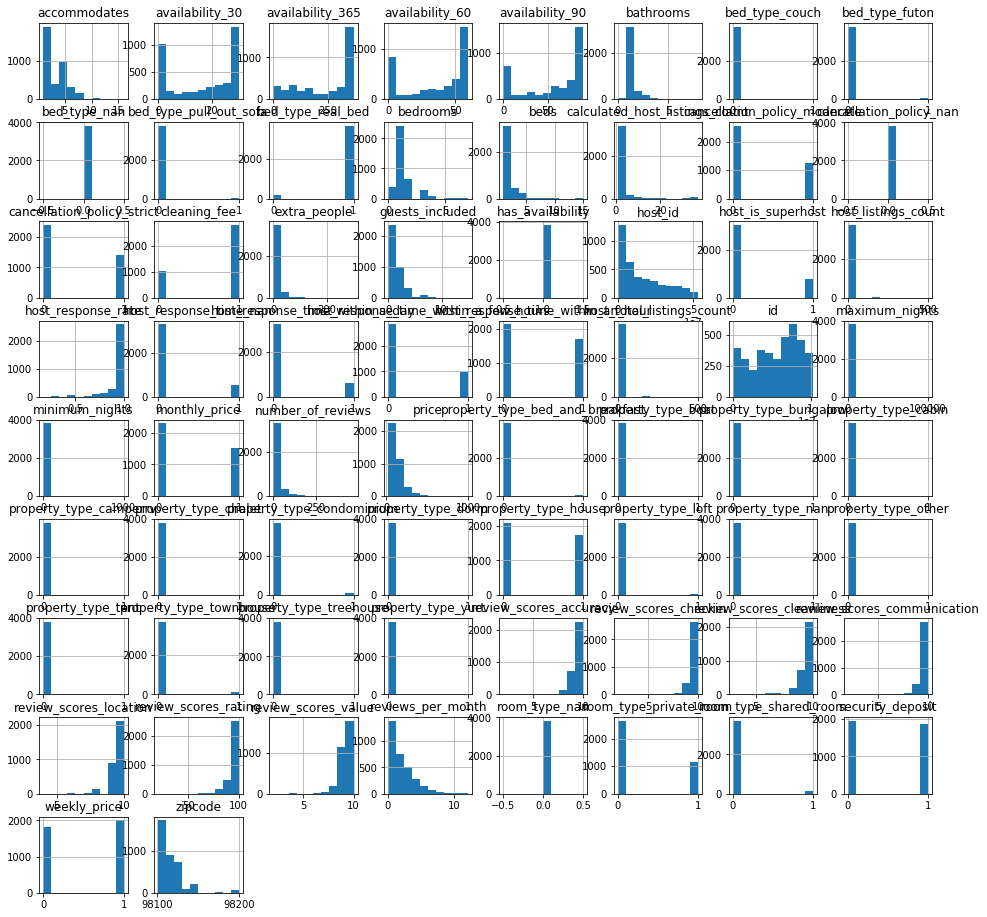

In [27]:
# Let's look at some histograms of our cleansed data to see if there is anything interesting here.
df_listings_cleansed.hist(figsize=(16,16));

In [28]:
# Now we'll start setting up some correlation matrices and 

# num_vars = ['bathrooms', 'bedrooms', 'beds', 'availability_365', 'availability_60', 'availability_90', 'maximum_nights', 
#          'minimum_nights', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication',
#           'review_scores_rating', 'review_scores_value', 'square_feet']

df_listings_num = df_listings[['bathrooms','price','bedrooms', 'beds', 'availability_365', 'availability_60', 'availability_90', 
                               'maximum_nights', 'minimum_nights', 'review_scores_checkin', 'review_scores_cleanliness', 
                               'review_scores_communication', 'review_scores_rating', 'review_scores_value']]

# df_listings_num = df_listings[[num_vars]]

In [29]:
# Use to plot heatmaps

def plot_heatmap(df, mytitle, annotation):
    ax = plt.axes()
    sns.set(rc = {'figure.figsize':(16,8)})
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

    ax.set_title(mytitle.title(), fontsize=16)
    sns.heatmap(df.corr(), annot=annotation, fmt='.2f', mask=mask, cmap='coolwarm', ax = ax)
    plt.show();
    

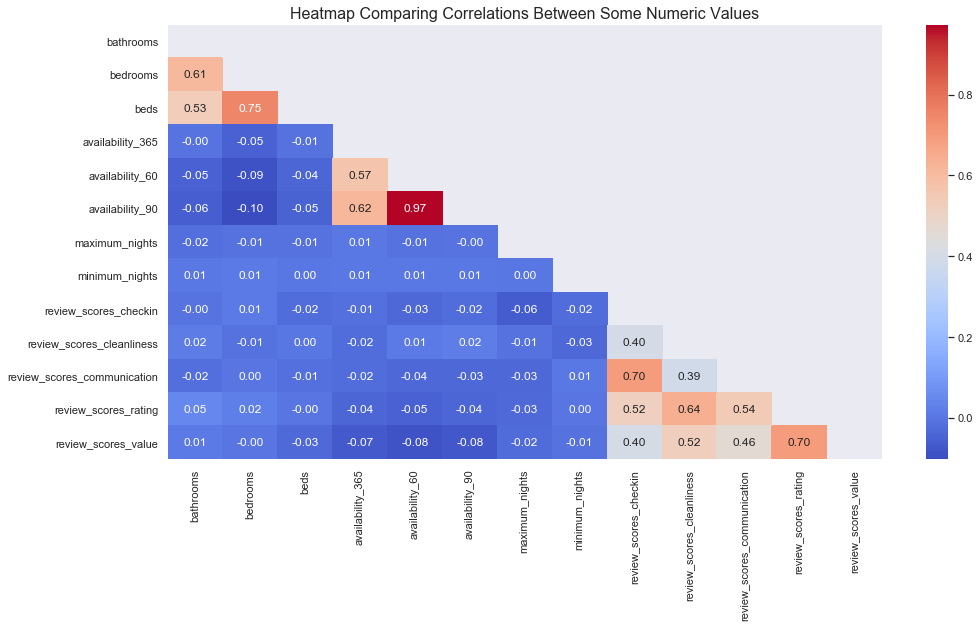

In [34]:
# Plot some of our numeric values

plot_heatmap(df_listings_num, 'Heatmap Comparing Correlations between some numeric values', True)

In [31]:
# Let's compare filling na's with the mean with not filling

#Here we fill on the column means
df_listings_cleansed2 = df_listings_cleansed.drop('host_since', axis=1)
df_listings_cleansed2.zipcode = df_listings_cleansed2.zipcode.fillna(0)
df_fillna = df_listings_cleansed2.apply(lambda x: x.fillna(x.mean()),axis=0)

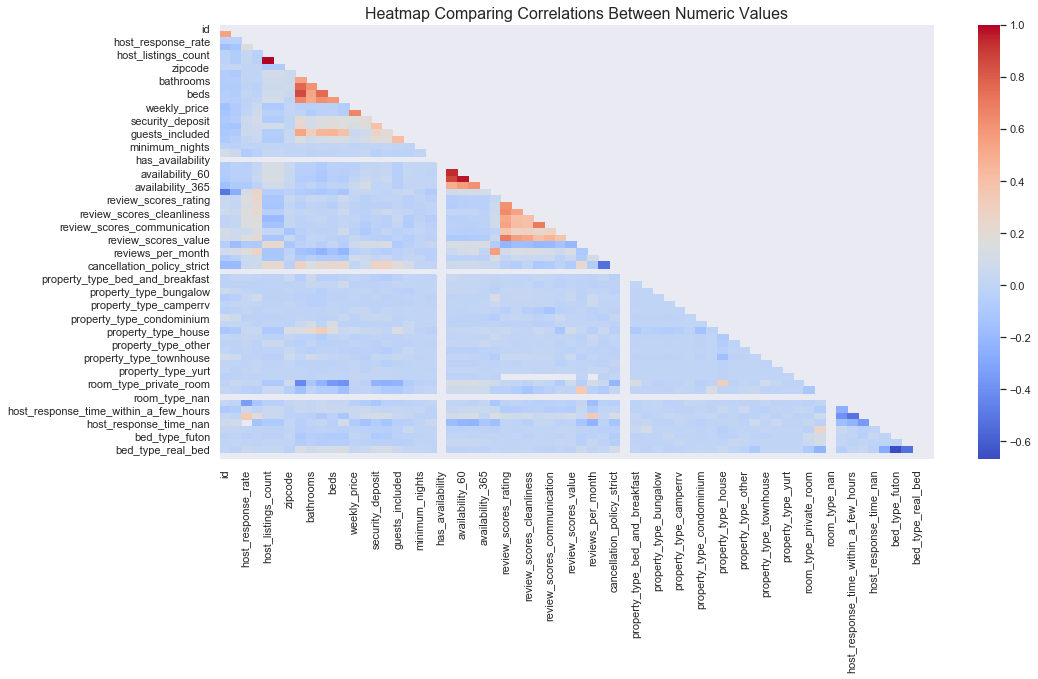

In [32]:
# This is too much! I'm not sure what this tells me, maybe break it up a little bit, let's try to a few passes, 
# focusing on reviews and location (zip) then look at three aspects: size/bedrooms/bathrooms/beds, pricing and host and 
# property types

plot_heatmap(df_listings_cleansed, 'Heatmap Comparing Correlations Between Numeric Values', False)

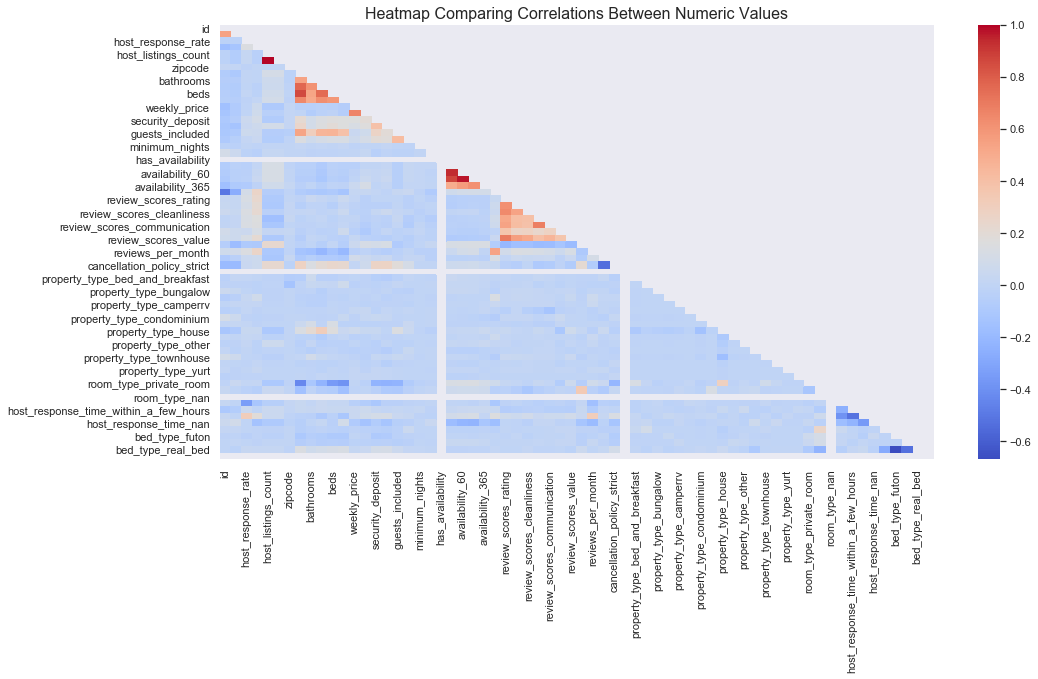

In [33]:
# Using the filled na's dataframe do we see much different from the non-filled? It really doesn't appear so.
plot_heatmap(df_fillna, 'Heatmap Comparing Correlations Between Numeric Values', False)

In [35]:
df_prop_size = df_listings_cleansed[['zipcode','price','review_scores_rating','review_scores_cleanliness',
                                     'review_scores_value','reviews_per_month','bathrooms','beds','room_type_private_room',
                                     'room_type_nan', 'room_type_shared_room','bed_type_couch', 'bed_type_futon',
                                     'bed_type_pull_out_sofa','bed_type_real_bed']]
df_prop_type = df_listings_cleansed[['zipcode','price','review_scores_rating','review_scores_cleanliness',
                                     'review_scores_value','reviews_per_month','property_type_bed_and_breakfast',
                                     'property_type_bungalow','property_type_camperrv',
                                     'property_type_house','property_type_other','property_type_townhouse',
                                     'property_type_dorm','property_type_chalet','property_type_boat',
                                     'property_type_condominium','property_type_tent','property_type_cabin',
                                     'property_type_treehouse','property_type_yurt']]
df_host_value = df_listings_cleansed[['zipcode','price','review_scores_rating','review_scores_cleanliness',
                                      'review_scores_value','reviews_per_month','host_response_rate','host_listings_count',
                                      'weekly_price', 'security_deposit','host_response_time_within_a_few_hours',
                                      'host_response_time_within_a_day','host_response_time_within_an_hour',
                                      'host_response_time_nan']]

df_prop_size_filled = df_fillna[['zipcode','price','review_scores_rating','review_scores_cleanliness',
                                     'review_scores_value','reviews_per_month','bathrooms','beds','room_type_private_room',
                                     'room_type_nan', 'room_type_shared_room','bed_type_couch', 'bed_type_futon',
                                     'bed_type_pull_out_sofa','bed_type_real_bed']]
df_prop_type_filled = df_fillna[['zipcode','price','review_scores_rating','review_scores_cleanliness',
                                     'review_scores_value','reviews_per_month','property_type_bed_and_breakfast',
                                     'property_type_bungalow','property_type_camperrv',
                                     'property_type_house','property_type_other','property_type_townhouse',
                                     'property_type_dorm','property_type_chalet','property_type_boat',
                                     'property_type_condominium','property_type_tent','property_type_cabin',
                                     'property_type_treehouse','property_type_yurt']]
df_host_value_filled = df_fillna[['zipcode','price','review_scores_rating','review_scores_cleanliness',
                                      'review_scores_value','reviews_per_month','host_response_rate','host_listings_count',
                                      'weekly_price', 'security_deposit','host_response_time_within_a_few_hours',
                                      'host_response_time_within_a_day','host_response_time_within_an_hour',
                                      'host_response_time_nan']]

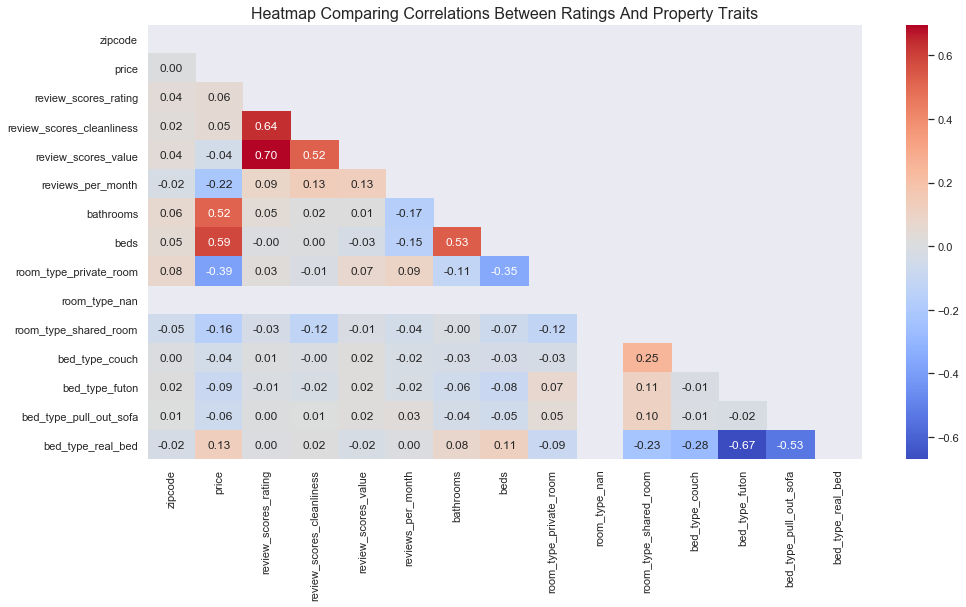

In [36]:
plot_heatmap(df_prop_size, 'Heatmap Comparing Correlations Between Ratings and property traits', True)

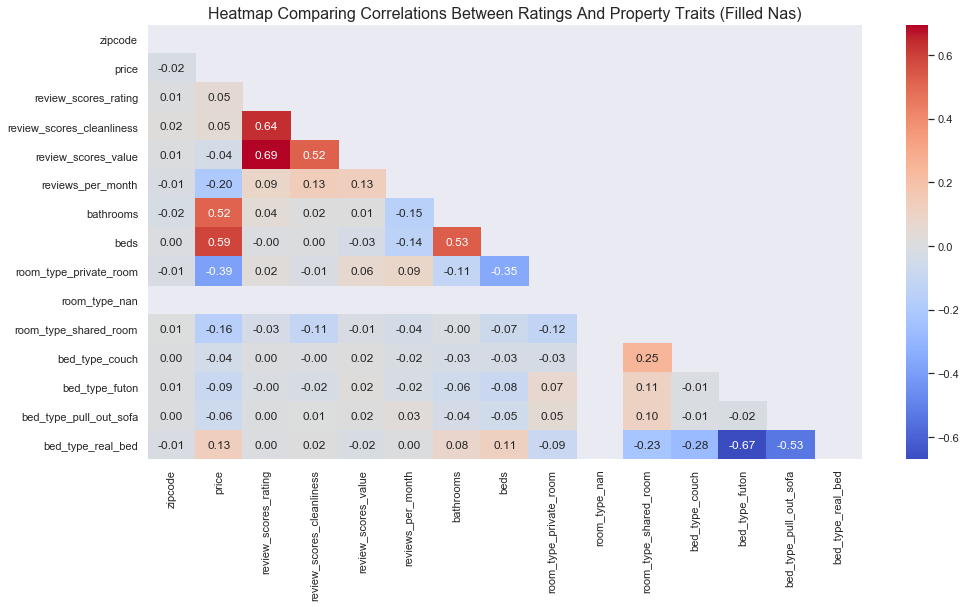

In [37]:
# No real difference here, nothing markedly significant at least
plot_heatmap(df_prop_size_filled, 'Heatmap Comparing Correlations Between Ratings and property traits (Filled NAs)', True)

Anything interesting here? 
- futons and pullout sofas negatively correlate with real beds and more likely appear in shared rooms, as do couches
- bedrooms and bathroom correlate and review scores cluster as well
- shared rooms negatively correlate with ratings
- unsurprisingly price correlates fairly strongly with number of rooms and bathrooms and negatively with private room.

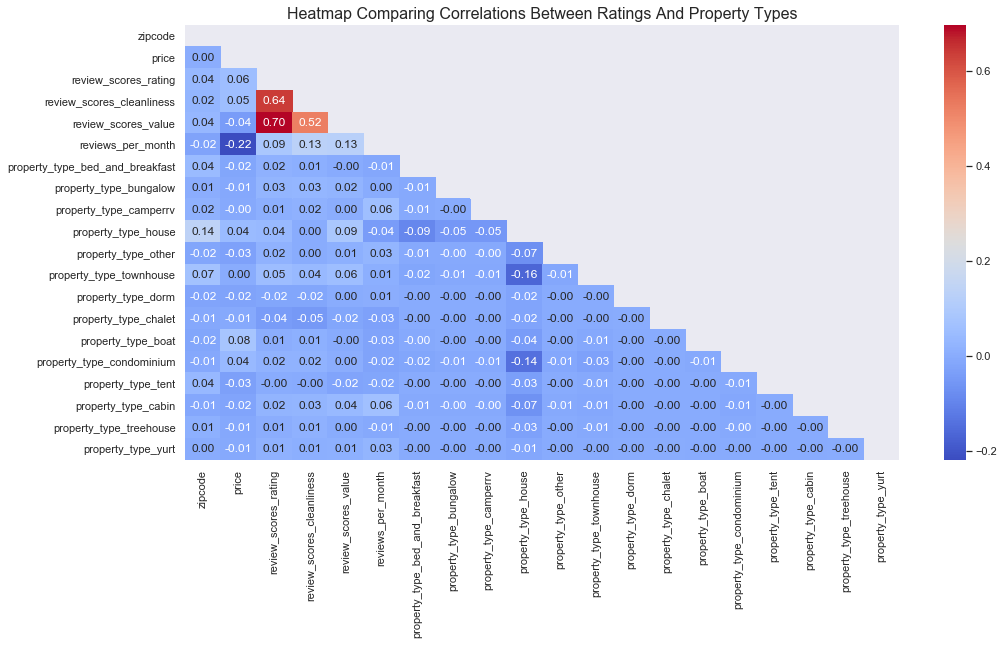

In [38]:
plot_heatmap(df_prop_type, 'Heatmap Comparing Correlations Between Ratings and property types', True)

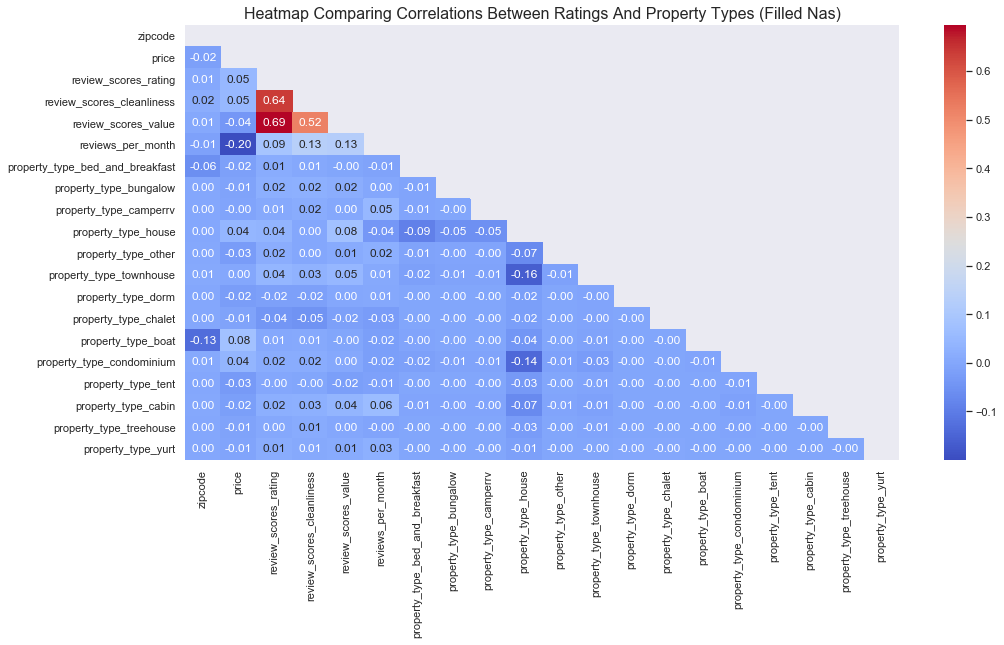

In [39]:
plot_heatmap(df_prop_type_filled, 'Heatmap Comparing Correlations Between Ratings and property types (filled NAs)', True)

Anything interesting here?
- houses seem to correlate with certain zipcodes
- campers negatively correlate with condominiums (HOAs likely)
- houses, cabins and townhouses seem to positively relate to reviews, tents not so much
- price negatively correlates with reviews per month. That might be something to investigate further down the road.


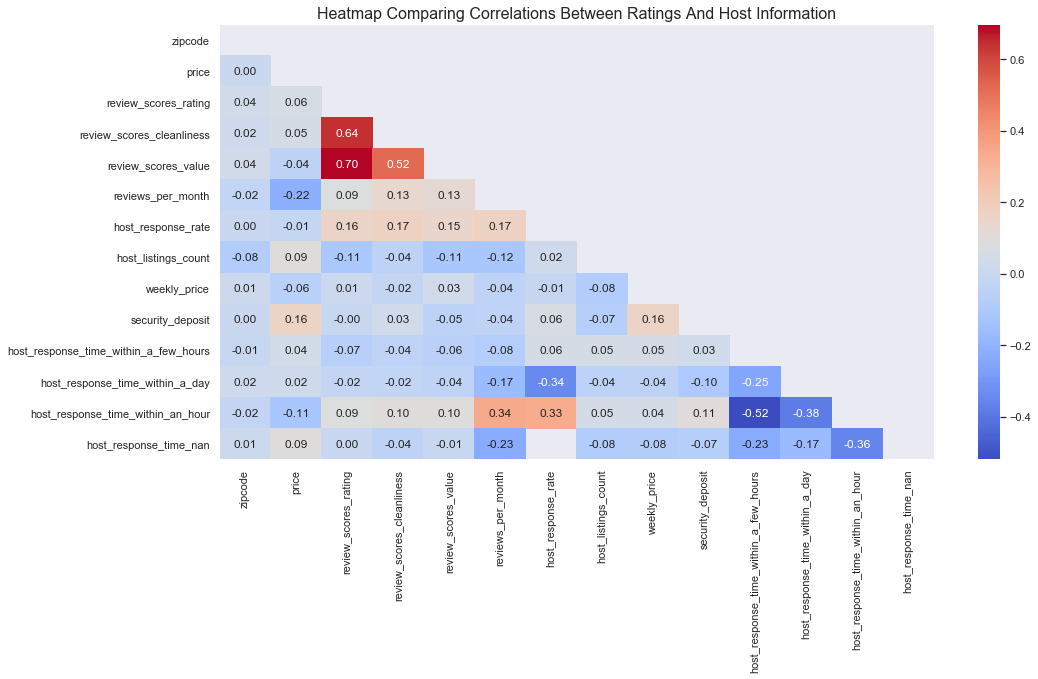

In [40]:
plot_heatmap(df_host_value, 'Heatmap Comparing Correlations Between Ratings and Host Information', True)

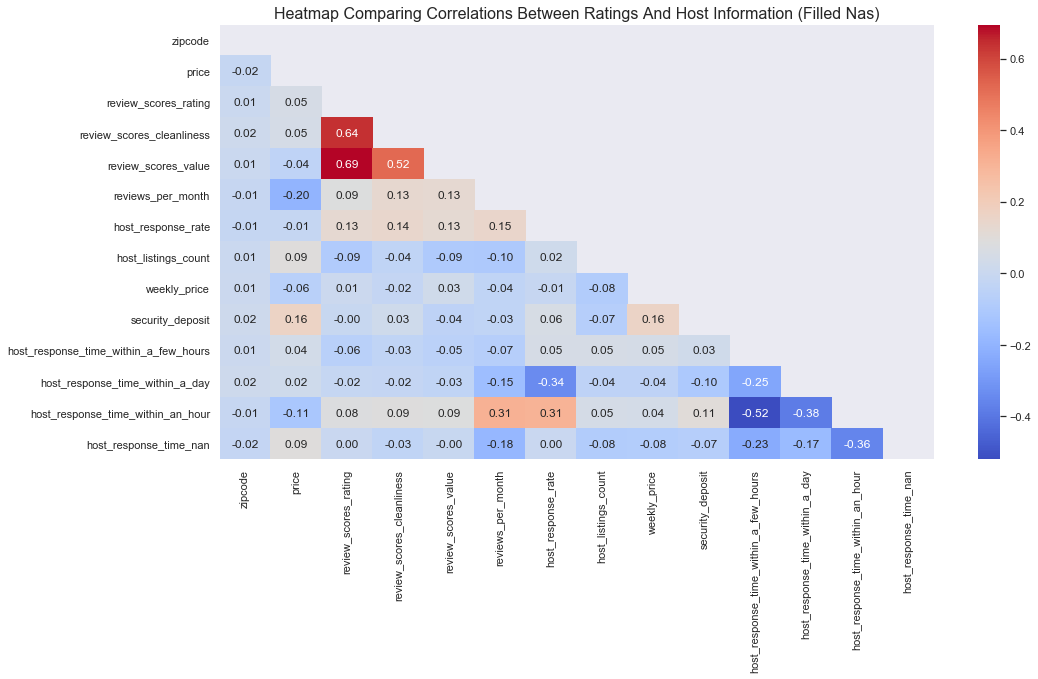

In [41]:
# Final breakdown of filled vs. non-filled, no really correlation changes here to speak of. Some very minor bumps in the 
# within_an_hour response and very, very minor ratings bumps.
plot_heatmap(df_host_value_filled, 'Heatmap Comparing Correlations Between Ratings and Host Information (Filled NAs)', True)

Anything interesting here?
- quicker responses seem to correlate to higher ratings and more reviews per month, interesting?

## Which features are most determinent?

Using Linear Regression First

In [42]:
# We'll used the filled to run a model against prices, since is limited difference and this will preserve the rest of the 
# data we do have (given our limited number of Seattle records)

X = df_fillna[['bathrooms','beds','room_type_private_room','room_type_shared_room', # 0-3
                      'bed_type_couch', 'bed_type_futon','bed_type_pull_out_sofa','bed_type_real_bed', # 4-7
                      'property_type_bed_and_breakfast','property_type_bungalow','property_type_camperrv', # 8-10
                      'property_type_condominium','property_type_house','property_type_other','property_type_townhouse', # 11-14
                      'property_type_dorm','property_type_tent','property_type_chalet','property_type_boat', # 14-18
                      'property_type_condominium','property_type_tent','property_type_cabin','property_type_treehouse', # 19-22
                      'property_type_yurt','host_response_rate','host_listings_count', # 23-25
                      'host_response_time_within_a_few_hours','host_response_time_within_a_day', # 26-27
                      'host_response_time_within_an_hour','host_response_time_nan', 'review_scores_rating']] # 28-30
y = df_fillna['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
y_test_preds = lm_model.predict(X_test) 

print(r2_score(y_test, y_test_preds))

0.4563560128162534


Feature: 0, Score: 48.29065
Feature: 1, Score: 25.49103
Feature: 2, Score: -41.26712
Feature: 3, Score: -76.26861
Feature: 4, Score: 44.42519
Feature: 5, Score: -50.85334
Feature: 6, Score: -24.04192
Feature: 7, Score: -25.13991
Feature: 8, Score: -26.22812
Feature: 9, Score: 28.69784
Feature: 10, Score: 28.08164
Feature: 11, Score: 9005022553102765.00000
Feature: 12, Score: -0.18693
Feature: 13, Score: 14.76287
Feature: 14, Score: 30.51775
Feature: 15, Score: -46.11479
Feature: 16, Score: 5179789971885414.00000
Feature: 17, Score: -250.00095
Feature: 18, Score: 139.57199
Feature: 19, Score: -9005022553102723.00000
Feature: 20, Score: -5179789971885475.00000
Feature: 21, Score: 7.85597
Feature: 22, Score: -2.67446
Feature: 23, Score: 43.64887
Feature: 24, Score: 114.13612
Feature: 25, Score: 0.14573
Feature: 26, Score: 9.85613
Feature: 27, Score: -1.22272
Feature: 28, Score: -29.14720
Feature: 29, Score: 22.86573
Feature: 30, Score: 0.13927


C:\Users\drche\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


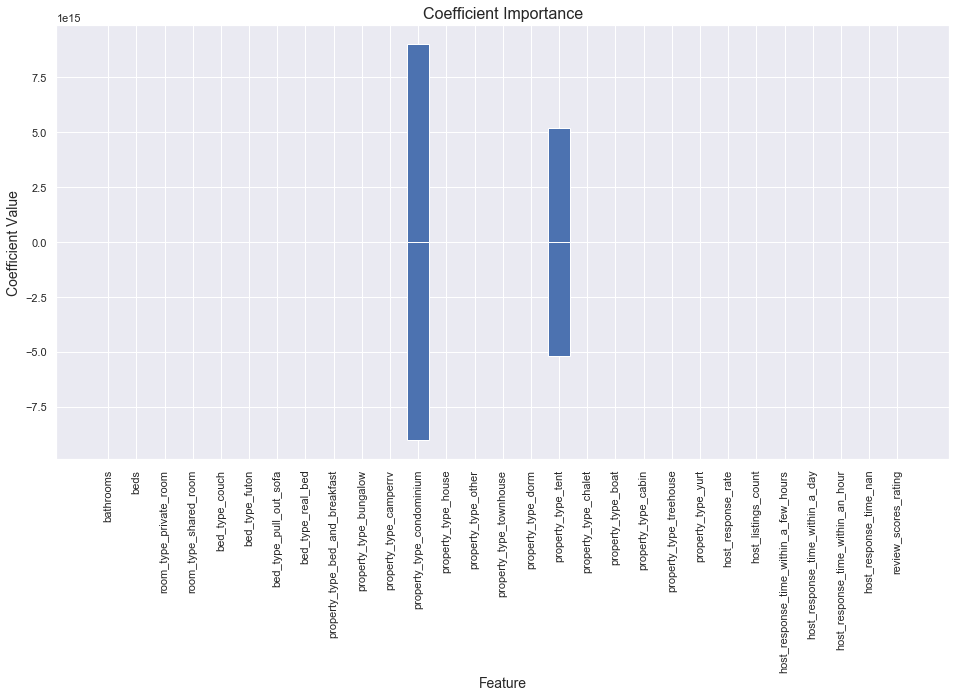

In [43]:
importance1 = lm_model.coef_
for i, v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))

coeffs1 = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lm_model.coef_})

plt.bar(coeffs1.Feature, coeffs1.Coefficients)
plt.xticks(rotation=90)
ax1 = plt.subplot()
plt.title('Coefficient Importance', fontsize=16)
ax1.set_xlabel('Feature', fontsize=14)
ax1.set_ylabel('Coefficient Value', fontsize=14)
plt.show;

#Print(coeffs)

In [44]:
y_test_preds = lm_model.predict(X_test)

print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.4563560128162534
4655.521969793061


In [45]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,55.0,3.776253,51.223747
1,82.0,105.865511,-23.865511
2,68.0,146.249456,-78.249456
3,58.0,92.909756,-34.909756
4,130.0,93.606083,36.393917


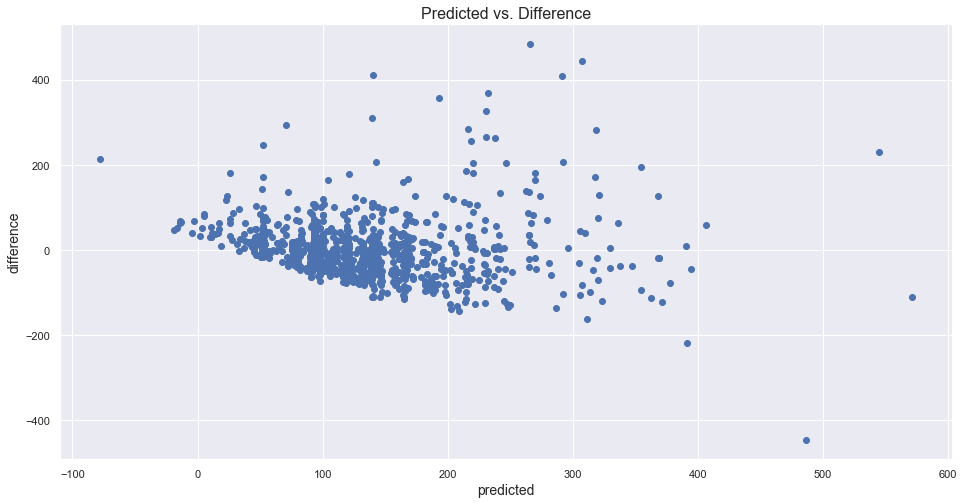

In [46]:
### We can plot how far our predictions are from the actual values compaired to the

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.title('Predicted vs. Difference', fontsize=16)
plt.xlabel('predicted', fontsize=14);
plt.ylabel('difference', fontsize=14);

## Which features are most determinent?

Using Decision Tree Classifier second

In [47]:
dtc_model = DecisionTreeClassifier() 
dtc_model.fit(X_train, y_train) 
        
y_test_preds = dtc_model.predict(X_test) 

print(r2_score(y_test, y_test_preds))

0.2646216594291406


Feature: 0, Score: 0.06767
Feature: 1, Score: 0.08008
Feature: 2, Score: 0.00785
Feature: 3, Score: 0.00574
Feature: 4, Score: 0.00082
Feature: 5, Score: 0.00991
Feature: 6, Score: 0.00891
Feature: 7, Score: 0.01382
Feature: 8, Score: 0.00196
Feature: 9, Score: 0.00260
Feature: 10, Score: 0.00315
Feature: 11, Score: 0.00927
Feature: 12, Score: 0.04461
Feature: 13, Score: 0.00308
Feature: 14, Score: 0.01794
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00168
Feature: 17, Score: 0.00055
Feature: 18, Score: 0.00138
Feature: 19, Score: 0.01082
Feature: 20, Score: 0.00055
Feature: 21, Score: 0.00556
Feature: 22, Score: 0.00101
Feature: 23, Score: 0.00056
Feature: 24, Score: 0.11385
Feature: 25, Score: 0.12977
Feature: 26, Score: 0.04454
Feature: 27, Score: 0.02597
Feature: 28, Score: 0.04002
Feature: 29, Score: 0.00971
Feature: 30, Score: 0.33663


C:\Users\drche\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


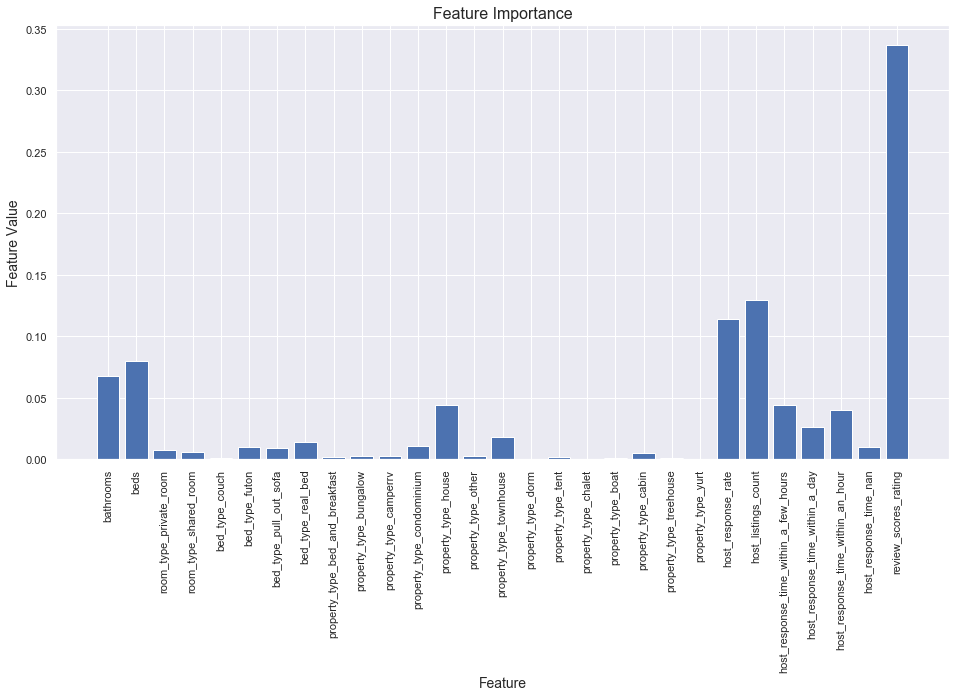

In [48]:
importance = dtc_model.feature_importances_
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plt.bar([x for x in range(len(importance))], importance)
# plt.show

coeffs = pd.DataFrame({"Feature":X_train.columns.tolist(),"FeatureImportance":dtc_model.feature_importances_})
plt.bar(coeffs.Feature, coeffs.FeatureImportance)
plt.xticks(rotation=90)
ax2 = plt.subplot()
plt.title('Feature Importance', fontsize=16)
ax2.set_xlabel('Feature', fontsize=14)
ax2.set_ylabel('Feature Value', fontsize=14)
plt.show;

## Which features are most determinent?

Finally Try a Random Forest Classifier

In [49]:
rfc_model = RandomForestClassifier() 
rfc_model.fit(X_train, y_train) 
        
y_test_preds = rfc_model.predict(X_test) 

print(r2_score(y_test, y_test_preds))

0.20820432236752728


C:\Users\drche\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.09569
Feature: 1, Score: 0.07837
Feature: 2, Score: 0.01345
Feature: 3, Score: 0.00714
Feature: 4, Score: 0.00124
Feature: 5, Score: 0.00685
Feature: 6, Score: 0.00465
Feature: 7, Score: 0.01102
Feature: 8, Score: 0.00597
Feature: 9, Score: 0.00274
Feature: 10, Score: 0.00297
Feature: 11, Score: 0.00512
Feature: 12, Score: 0.03268
Feature: 13, Score: 0.00355
Feature: 14, Score: 0.01125
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00087
Feature: 17, Score: 0.00065
Feature: 18, Score: 0.00104
Feature: 19, Score: 0.00441
Feature: 20, Score: 0.00030
Feature: 21, Score: 0.00360
Feature: 22, Score: 0.00109
Feature: 23, Score: 0.00076
Feature: 24, Score: 0.10415
Feature: 25, Score: 0.14909
Feature: 26, Score: 0.02275
Feature: 27, Score: 0.01762
Feature: 28, Score: 0.02104
Feature: 29, Score: 0.01285
Feature: 30, Score: 0.37704


C:\Users\drche\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


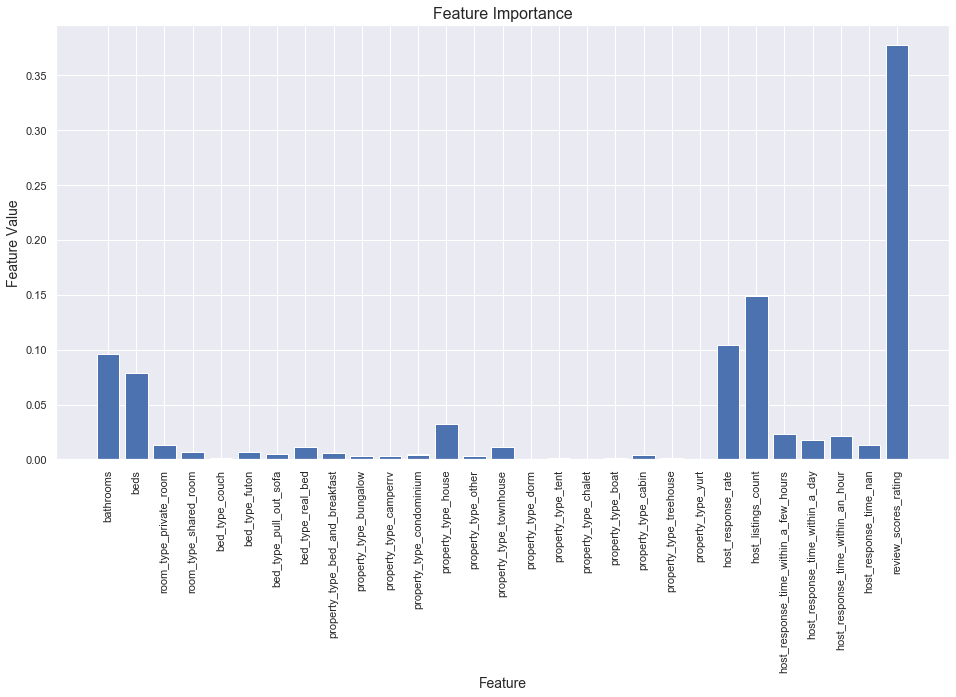

In [50]:
importance = rfc_model.feature_importances_
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plt.bar([x for x in range(len(importance))], importance)
# plt.show

coeffs = pd.DataFrame({"Feature":X_train.columns.tolist(),"FeatureImportance":rfc_model.feature_importances_})
plt.bar(coeffs.Feature, coeffs.FeatureImportance)
plt.xticks(rotation=90)
ax3 = plt.subplot()
plt.title('Feature Importance', fontsize=16)
ax3.set_xlabel('Feature', fontsize=14)
ax3.set_ylabel('Feature Value', fontsize=14)
plt.show;

So looking at these, it looks like some obvious, number of rooms and bathrooms can determine price (and if it is a house as opposed to a yurt or tent for example or dorm), but also some other features corrleted to higher prices, number of host listings and host response time are also strong indicators.

One last pass at this, lets see if we get something similar with host ratings.

In [51]:
X = df_fillna[['bathrooms','beds','room_type_private_room','room_type_shared_room', # 0-3
                      'bed_type_couch', 'bed_type_futon','bed_type_pull_out_sofa','bed_type_real_bed', # 4-7
                      'property_type_bed_and_breakfast','property_type_bungalow','property_type_camperrv', # 8-10
                      'property_type_condominium','property_type_house','property_type_other','property_type_townhouse', # 11-14
                      'property_type_dorm','property_type_tent','property_type_chalet','property_type_boat', # 14-18
                      'property_type_condominium','property_type_tent','property_type_cabin','property_type_treehouse', # 19-22
                      'property_type_yurt','host_response_rate','host_listings_count', # 23-25
                      'host_response_time_within_a_few_hours','host_response_time_within_a_day', # 26-27
                      'host_response_time_within_an_hour','host_response_time_nan', 'price']] # 28-30
y = df_fillna['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
y_test_preds = lm_model.predict(X_test) 

print(r2_score(y_test, y_test_preds))

-0.012842823265742487


Feature: 0, Score: 0.24599
Feature: 1, Score: -0.32643
Feature: 2, Score: -0.15412
Feature: 3, Score: -1.31358
Feature: 4, Score: 1.48431
Feature: 5, Score: 0.60059
Feature: 6, Score: 0.97696
Feature: 7, Score: 0.37136
Feature: 8, Score: 0.39422
Feature: 9, Score: 3.36528
Feature: 10, Score: 1.28945
Feature: 11, Score: -4474919361944.16113
Feature: 12, Score: 0.61116
Feature: 13, Score: 3.16170
Feature: 14, Score: 1.67126
Feature: 15, Score: 2.03877
Feature: 16, Score: 57211064935580.19531
Feature: 17, Score: -23.84140
Feature: 18, Score: -1.86172
Feature: 19, Score: 4474919361945.29492
Feature: 20, Score: -57211064935579.06250
Feature: 21, Score: 1.15042
Feature: 22, Score: 1.78858
Feature: 23, Score: 5.12353
Feature: 24, Score: 6.25858
Feature: 25, Score: -0.01806
Feature: 26, Score: 3.27795
Feature: 27, Score: 4.13521
Feature: 28, Score: 4.58119
Feature: 29, Score: 3.90259
Feature: 30, Score: 0.00605


C:\Users\drche\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


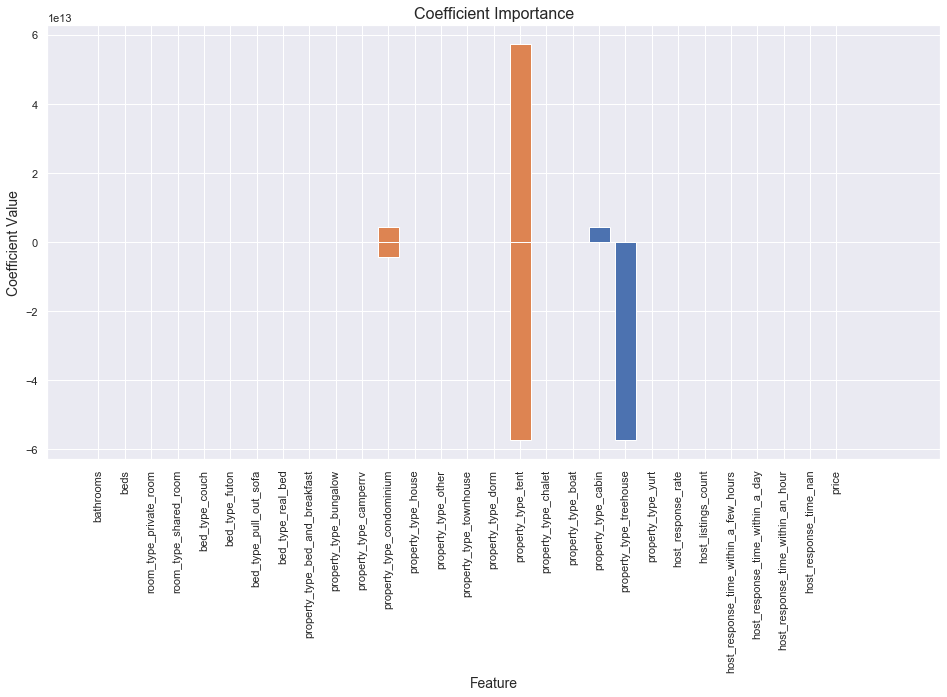

In [52]:
importance = lm_model.coef_
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show

coeffs = pd.DataFrame({"Feature":X_train.columns.tolist(),"FeatureImportance":lm_model.coef_})
plt.bar(coeffs.Feature, coeffs.FeatureImportance)
plt.xticks(rotation=90)
ax4 = plt.subplot()
plt.title('Coefficient Importance', fontsize=16)
ax4.set_xlabel('Feature', fontsize=14)
ax4.set_ylabel('Coefficient Value', fontsize=14)
plt.show;

In [53]:
dtc_model = DecisionTreeRegressor() 
dtc_model.fit(X_train, y_train) 
        
y_test_preds = dtc_model.predict(X_test) 

print(r2_score(y_test, y_test_preds))

-0.5584227617503121


Feature: 0, Score: 0.06322
Feature: 1, Score: 0.07409
Feature: 2, Score: 0.02296
Feature: 3, Score: 0.00228
Feature: 4, Score: 0.00004
Feature: 5, Score: 0.00746
Feature: 6, Score: 0.00215
Feature: 7, Score: 0.00208
Feature: 8, Score: 0.00613
Feature: 9, Score: 0.00119
Feature: 10, Score: 0.00021
Feature: 11, Score: 0.00951
Feature: 12, Score: 0.04453
Feature: 13, Score: 0.00082
Feature: 14, Score: 0.00820
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00751
Feature: 18, Score: 0.00046
Feature: 19, Score: 0.01031
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00378
Feature: 22, Score: 0.00027
Feature: 23, Score: 0.00014
Feature: 24, Score: 0.15862
Feature: 25, Score: 0.14524
Feature: 26, Score: 0.01683
Feature: 27, Score: 0.01413
Feature: 28, Score: 0.01245
Feature: 29, Score: 0.00563
Feature: 30, Score: 0.37969


C:\Users\drche\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


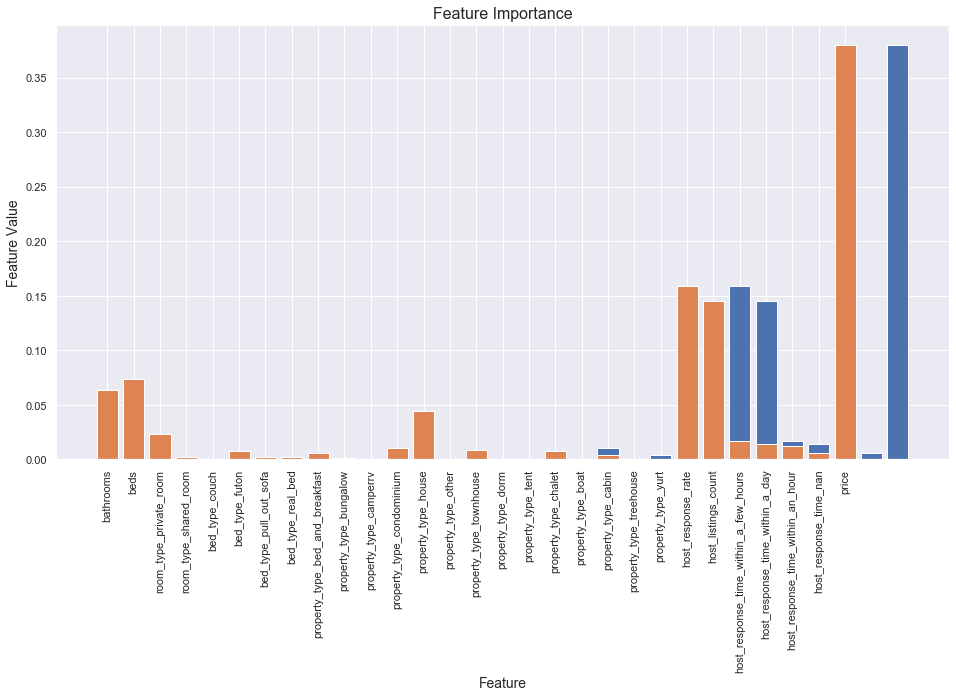

In [54]:
importance = dtc_model.feature_importances_
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show

coeffs = pd.DataFrame({"Feature":X_train.columns.tolist(),"FeatureImportance":dtc_model.feature_importances_})
plt.bar(coeffs.Feature, coeffs.FeatureImportance)
plt.xticks(rotation=90)
ax5 = plt.subplot()
plt.title('Feature Importance', fontsize=16)
ax5.set_xlabel('Feature', fontsize=14)
ax5.set_ylabel('Feature Value', fontsize=14)
plt.show;

In [55]:
print(coeffs)

                                  Feature  FeatureImportance
0                               bathrooms           0.063219
1                                    beds           0.074094
2                  room_type_private_room           0.022958
3                   room_type_shared_room           0.002285
4                          bed_type_couch           0.000039
5                          bed_type_futon           0.007461
6                  bed_type_pull_out_sofa           0.002149
7                       bed_type_real_bed           0.002084
8         property_type_bed_and_breakfast           0.006130
9                  property_type_bungalow           0.001191
10                 property_type_camperrv           0.000215
11              property_type_condominium           0.009511
12                    property_type_house           0.044534
13                    property_type_other           0.000816
14                property_type_townhouse           0.008195
15                     p

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

rfc_model = RandomForestRegressor() 
rfc_model.fit(X_train, y_train) 
        
y_test_preds = rfc_model.predict(X_test) 

print(r2_score(y_test, y_test_preds))


-0.12979290737777904


C:\Users\drche\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.05906
Feature: 1, Score: 0.07038
Feature: 2, Score: 0.02820
Feature: 3, Score: 0.00425
Feature: 4, Score: 0.00191
Feature: 5, Score: 0.00647
Feature: 6, Score: 0.00208
Feature: 7, Score: 0.00648
Feature: 8, Score: 0.00555
Feature: 9, Score: 0.00091
Feature: 10, Score: 0.00088
Feature: 11, Score: 0.00604
Feature: 12, Score: 0.05445
Feature: 13, Score: 0.00086
Feature: 14, Score: 0.00843
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00015
Feature: 17, Score: 0.00637
Feature: 18, Score: 0.00053
Feature: 19, Score: 0.00524
Feature: 20, Score: 0.00003
Feature: 21, Score: 0.00220
Feature: 22, Score: 0.00025
Feature: 23, Score: 0.00017
Feature: 24, Score: 0.14642
Feature: 25, Score: 0.14351
Feature: 26, Score: 0.03128
Feature: 27, Score: 0.01777
Feature: 28, Score: 0.01648
Feature: 29, Score: 0.00652
Feature: 30, Score: 0.36708


C:\Users\drche\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


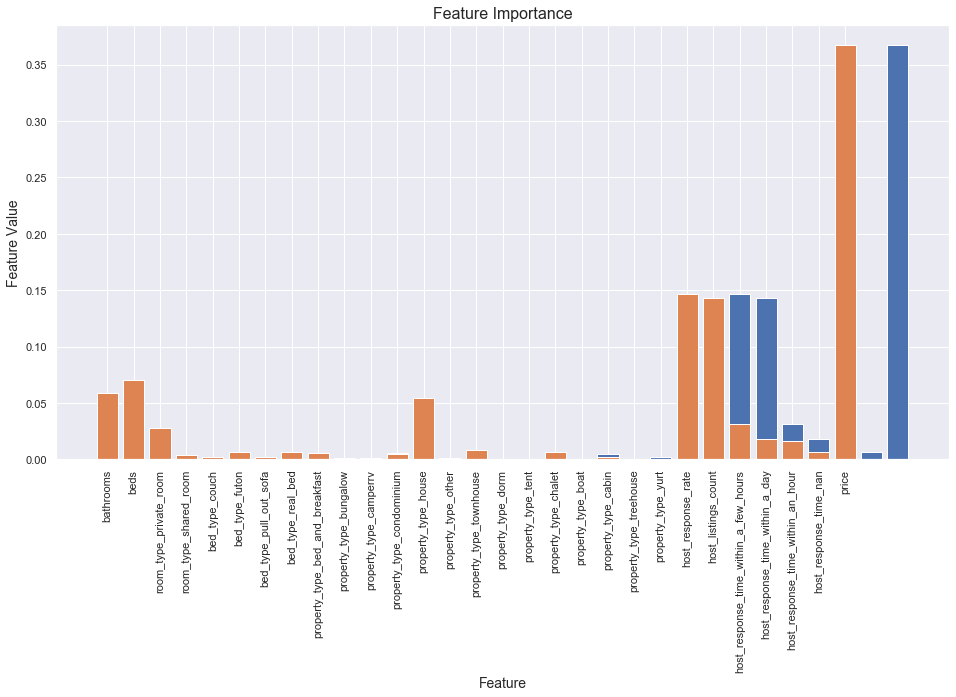

In [57]:
importance = rfc_model.feature_importances_
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show

coeffs = pd.DataFrame({"Feature":X_train.columns.tolist(),"FeatureImportance":rfc_model.feature_importances_})
plt.bar(coeffs.Feature, coeffs.FeatureImportance)
plt.xticks(rotation=90)
ax6 = plt.subplot()
plt.title('Feature Importance', fontsize=16)
ax6.set_xlabel('Feature', fontsize=14)
ax6.set_ylabel('Feature Value', fontsize=14)
plt.show;

Finally, looking at that price and review scores seem highly correlated. Number of responses and number of listings seem to correlate to both price and ratings, as does rooms, bathrooms and property type of house.

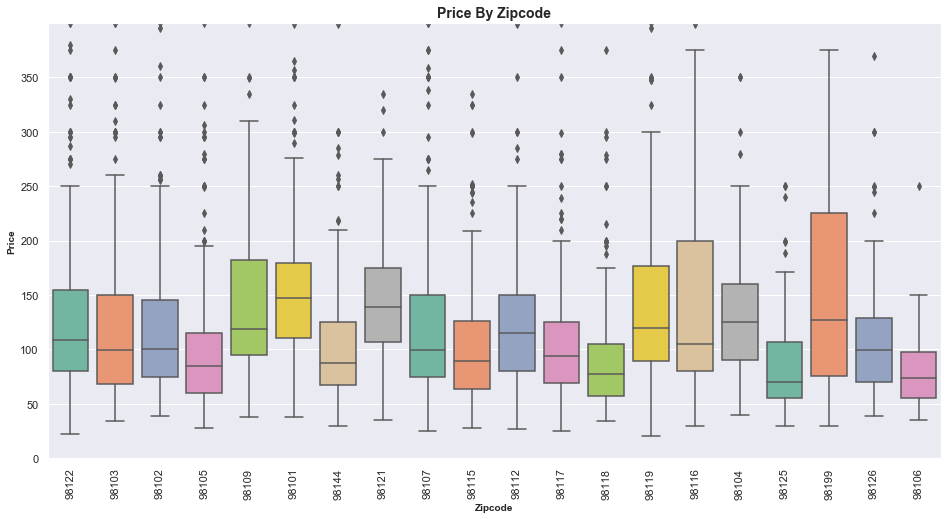

In [59]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.ylim(0,df_fillna.price.quantile(0.98))
plt.title("Price by Zipcode".title(), fontsize=14, weight='bold')
gfg = sns.boxplot(data=df_fillna, y='price', x='zipcode', palette='Set2', 
            order=df_fillna.zipcode.value_counts().iloc[:20].index)
gfg.set_xlabel("Zipcode".title(), fontsize=10, weight='bold')
gfg.set_ylabel('Price'.title(), fontsize=10, weight='bold');